## Have to download TeX for fancy plots...

In [1]:
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35
  libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  pfb2t1c2pfb poppler-data preview-latex-style rake ruby ruby-net-telnet
  ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0 rubygems-integration t1utils
  tex-common tex-gyre texlive-base texlive-binaries texlive-fonts-recommended
  texlive-latex-base texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf ghostscript-x
  libavalon-fram

## And coninue...

In [2]:
# prompt: Mount my Drive and also import all of the necessary packages to plot things using matplotlib, numpy and pandas.

from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd


Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set up Seaborn style for better aesthetics
sns.set(style="ticks", palette='bright')
plt.rcParams.update({
    "text.usetex": True,  # Use LaTeX for text rendering
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "axes.labelsize": 15,
    "axes.titlesize": 18,
    "font.size": 12,
    "legend.fontsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "figure.dpi": 150,  # High resolution
    "savefig.dpi": 300  # High resolution for saving
})

In [4]:
# State your working directory to access the data and save the figures
wd = '/content/drive/Shareddrives/Bachelor Research Project/Final_Results/3.3.1.Array_of_Cells'


In [5]:
constant = pd.read_csv(f'{wd}/Constant/Constant.csv', header=None, names=['Time', 'Bext', 'Vertical Disp', 'Horizontal Disp'])
neg_constant = pd.read_csv(f'{wd}/Negative_Constant/Negative_Constant.csv', header=None, names=['Time', 'Bext', 'Vertical Disp', 'Horizontal Disp'])
increasing = pd.read_csv(f'{wd}/Increasing/Increasing.csv', header=None, names=['Time', 'Bext', 'Vertical Disp', 'Horizontal Disp'])
sinusoidal = pd.read_csv(f'{wd}/Sinusoidal/Sinusoidal.csv', header=None, names=['Time', 'Bext', 'Vertical Disp', 'Horizontal Disp'])


In [6]:
constant

,Time,Bext,Vertical Disp,Horizontal Disp
0,0.000,31.847,0.000105,0.000004
1,0.005,31.847,0.097213,-0.023839
2,0.010,31.847,0.088090,-0.009374
3,0.015,31.847,0.091490,-0.015483
4,0.020,31.847,0.092979,-0.015656
...,...,...,...,...
996,4.980,31.847,0.514758,-0.552368
997,4.985,31.847,0.514785,-0.552419
998,4.990,31.847,0.514811,-0.552470
999,4.995,31.847,0.514838,-0.552520


In [10]:
# The constants for the unit cell

p = 5
T = 5 # s
Ly = 3 # mm
Lx = 10 #mm
conv = 0.628 # mT / (kA/m)

In [11]:
# Updated lengths of the structure

Lx_s = Lx*p - 0.5*(p-1)
Ly_s = Ly*p - 0.5*(p-1)

print(Ly_s, Lx_s)

13.0 48.0


## Final Graph

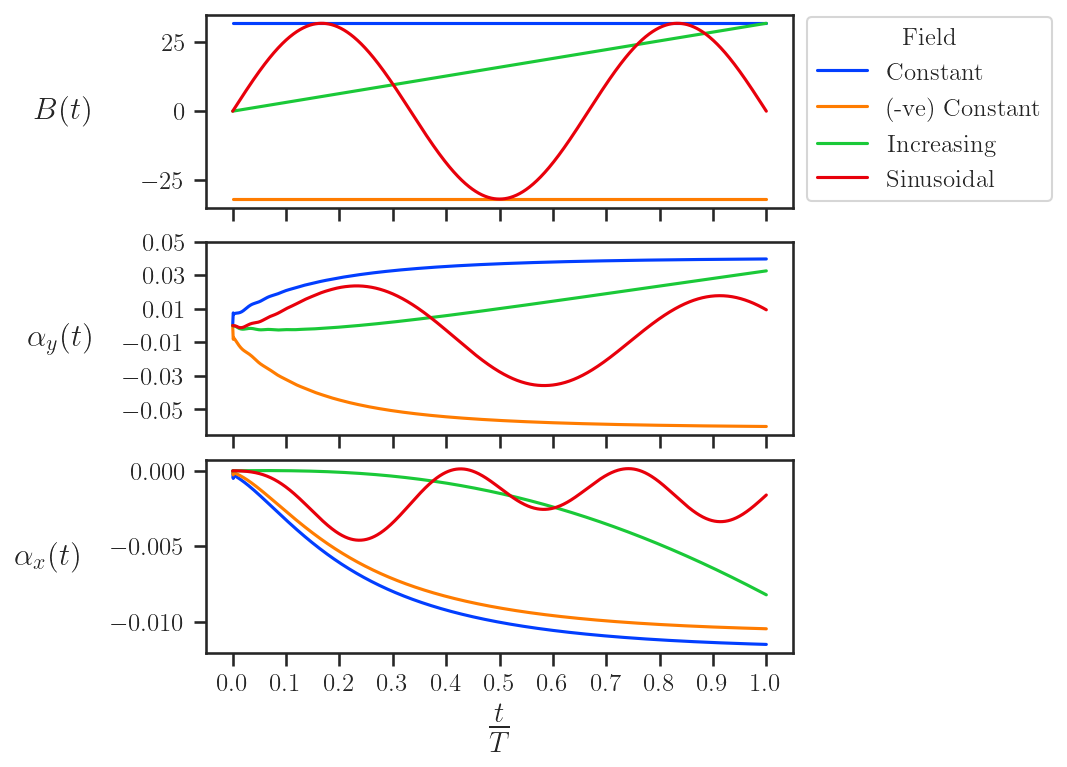

In [19]:
dfs = [constant, neg_constant, increasing, sinusoidal]
field = ['Constant', r'(-ve) Constant', 'Increasing', 'Sinusoidal']

fig, ax = plt.subplots(3, 1, sharex=True,figsize=(7, 5), layout='constrained')


j = 0
for i in dfs:
    # Plotting every fifth point
    ax[0].plot(i['Time']/T, i['Bext'], label=field[j])
    ax[1].plot(i['Time']/T, i['Vertical Disp']/Ly_s)
    ax[2].plot(i['Time']/T, i['Horizontal Disp']/Lx_s)
    j += 1

# Add legend
ax[0].legend(title='Field', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0.1)


# Set the labels with proper LaTeX formatting
ax[0].set_ylabel(r'$B(t)$', rotation='horizontal', va='center', labelpad=38)
ax[1].set_ylabel(r'$\alpha_y(t)$', rotation='horizontal', va='center', labelpad=30)
ax[1].set_yticks(np.arange(-0.05, 0.06, 0.02))
ax[2].set_ylabel(r'$\alpha_x(t)$', rotation='horizontal', va='center', labelpad=30)


ax[2].set_xlabel(r'$\frac{t}{T}$', fontsize=20)
ax[2].set_xticks(np.arange(0,1.1,0.1))

plt.savefig(f'{wd}/P5_Array_Response.svg', dpi=300)
plt.savefig(f'{wd}/P5_Array_Response.png', dpi=300)

plt.show()
